<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/4_Multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import matplotlib.pyplot as plt
 
import torch
import torch.nn as nn

---
# Activation Functions

Different activation functions provide different uses

### Sigmoid / Logistic function

Transform $ - \infty $ to $ \infty $ into 0 to 1 range
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

In [78]:
inp_min = -5.0
inp_max = 5.0
inp_sz  = 100
inp_din = (inp_max - inp_min) / inp_sz
 
inp = torch.linspace(inp_min, inp_max, inp_sz)

In [79]:
sig_out = torch.sigmoid(inp)

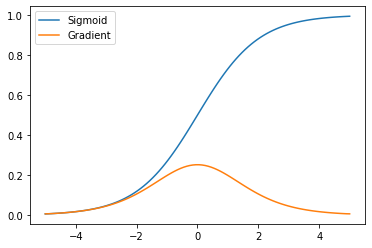

In [80]:
plt.plot(inp, sig_out, label="Sigmoid")
plt.plot(inp, np.gradient(sig_out)/inp_din, label="Gradient")
plt.legend()
plt.show()

### Tanh function

$$ 
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Similar to sigmoid, difference being that output is -1 to +1

In [81]:
tanh_out = torch.tanh(inp)

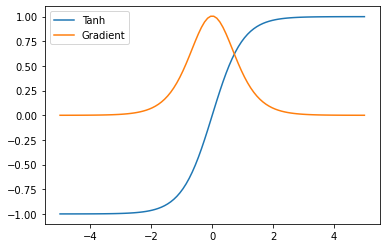

In [82]:
plt.plot(inp, tanh_out, label="Tanh")
plt.plot(inp, np.gradient(tanh_out)/inp_din, label='Gradient')
plt.legend()
plt.show()

### Rectified Linear Unit (ReLU)

ReLU is basically like a diode. It makes sure that output is always > 0.

$$
ReLU(x) = 
\left\{ \begin{array}{r} 
x, x > 0\\[1ex]
0, x \le 0
\end{array} \right. 
$$

In [83]:
relu_out = torch.relu(inp)

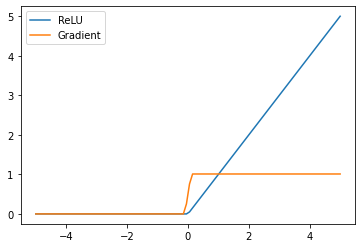

In [84]:
plt.plot(inp, relu_out, label="ReLU")
plt.plot(inp, np.gradient(relu_out)/inp_din, label='Gradient')
plt.legend()
plt.show()

But, the gradient of ReLU becomes zero for $ x \le 0 $ which can lead to some neurons *dying* because all neurons have negative input to the ReLU function.

### Leaky ReLU

Leaky relu is similar to ReLU but has a very small gradient when $ x \lt 0 $

In [85]:
lrelu_out = torch.nn.functional.leaky_relu(inp)

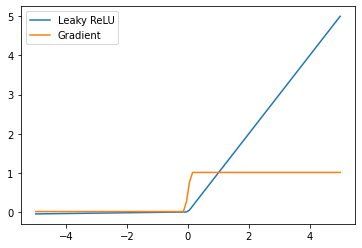

In [86]:
plt.plot(inp, lrelu_out, label="Leaky ReLU")
plt.plot(inp, np.gradient(lrelu_out)/0.1, label="Gradient")
plt.legend()
plt.show()

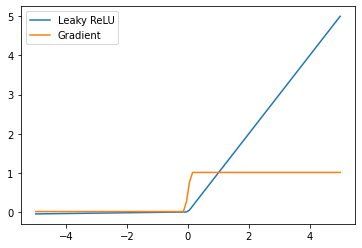

In [87]:
plt.plot(inp, lrelu_out, label="Leaky ReLU")
plt.plot(inp, np.gradient(lrelu_out)/0.1, label="Gradient")
plt.legend()
plt.show()

In [88]:
print(" ReLU at -1       : %.3f"%(torch.relu(torch.tensor(-1.0))))
print(" Leaky ReLU at -1 : %.3f"%(torch.nn.functional.leaky_relu(torch.tensor(-1.0))))

 ReLU at -1       : 0.000
 Leaky ReLU at -1 : -0.010


---

# Multilayer neural network

The dataset
- XOR
- Circle

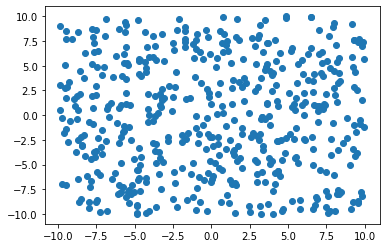

In [121]:
data_len = 500

data_x = np.random.uniform(-10, 10, size=(data_len, 1))
data_y = np.random.uniform(-10, 10, size=(data_len, 1))

data_in = np.concatenate((data_x, data_y), axis=1)

# 0 : Xor, 1 : Circle
dataset = 0

plt.scatter(data_x, data_y)
plt.show()

[]

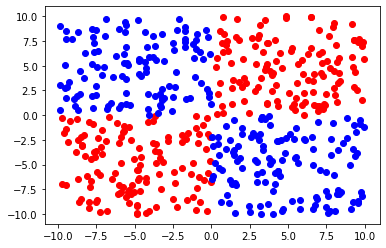

In [122]:
def xor_decision(inp_x, inp_y):
  x_bool = inp_x > 0
  y_bool = inp_y > 0
  return (x_bool & y_bool) | ((~x_bool) & (~y_bool))

def circle_decision(inp_x, inp_y):
  dist = np.sqrt(np.square(inp_x) + np.square(inp_y))
  return dist > 5

def act_decision(inp_x, inp_y):
  if(dataset == 0):
    return xor_decision(inp_x, inp_y)
  elif(dataset == 1):
    return circle_decision(inp_x, inp_y)

data_out = act_decision(data_x, data_y)

data_on   = np.asarray([data_in[i] for i in range(data_len) if data_out[i]])
data_off  = np.asarray([data_in[i] for i in range(data_len) if not data_out[i]])

plt.scatter(data_on[:,0], data_on[:,1], color="red")
plt.scatter(data_off[:,0], data_off[:,1], color="blue")
plt.plot()

In [91]:
#@title
def vis_boundary(data, labels, fun, show_points=True, ax = None):
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)
  X_flat = X.reshape((-1, 1))
  Y_flat = Y.reshape((-1, 1))
  out = fun(np.concatenate((X_flat, Y_flat), axis=1))

  if(ax == None):
    fig = plt.figure()
    ax = fig.add_subplot()
  else:
    fig = None

  c = ax.contourf(X, Y, out.reshape(X.shape), cmap='plasma')
  
  if(fig != None):
    fig.colorbar(c)
  
  if(show_points):
    inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
    inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])
    ax.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
    ax.legend()

  if(fig != None):
    fig.show()

In [92]:
#@title
def vis_boundary3D(data, labels, fun, show_points=True, ax = None):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)
  X_flat = X.reshape((-1, 1))
  Y_flat = Y.reshape((-1, 1))
  out = fun(np.concatenate((X_flat, Y_flat), axis=1))

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  if(ax == None):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
  else:
    fig = None
  
  ax.set_title("Z")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
    ax.legend()
  
  c = ax.plot_surface(X, Y, out.reshape(X.shape), cmap='plasma', alpha=0.5)
  ax.view_init(20, -70)

  if(fig != None):
    fig.show()

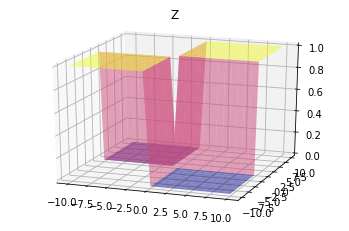

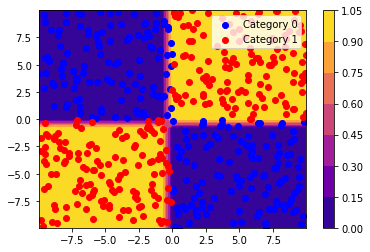

In [93]:
#@title
vis_boundary3D(data_in, data_out, lambda x : (act_decision(x[:,0], x[:,1])).reshape(-1, 1), False)

vis_boundary(data_in, data_out, lambda x : (act_decision(x[:,0], x[:,1])).reshape(-1, 1))

THis is what a perfect decision boundary for this dataset looks like (you dont need to understand the code. Its a bit messy). 

---

# Neural network

Now, lets try and create a neural network.

![](https://raw.githubusercontent.com/Ashwin-Rajesh/PyTorch_IEEE_2021/main/docs/multilayer.png)

In [94]:
class single_layer_network(nn.Module):
  def __init__(self):
    super(single_layer_network, self).__init__()
    self.fc1 = nn.Linear(2, 4)    # Convert 2 features (x, y) to 4
    self.fc2 = nn.Linear(4, 1)    # Convert 4 features (H0, H1, H2, H3) to 1

  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    out = torch.sigmoid(self.fc2(x))
    return out

  def hidden(self, x):
    return torch.tanh(self.fc1(x))

  def print(self):
    return 

In [95]:
def train_model(x_train, y_train, model, criterion, optim, epochs, log_per = 100):
    loss_hist = []

    for epoch in range(epochs):
        optim.zero_grad()
        # Forward pass
        y_pred = model(x_train)
        # Compute Loss
        loss = criterion(y_pred, y_train)

        loss_hist.append(loss)

        if(epoch % log_per == 0):
          vis_boundary3D(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))
      
          vis_boundary(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))

        # Backward pass
        loss.backward()
        optim.step()

    return loss_hist

In [96]:
model_1 = single_layer_network()
criterion = nn.BCELoss()
optim = torch.optim.SGD(model_1.parameters(), lr=1e-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


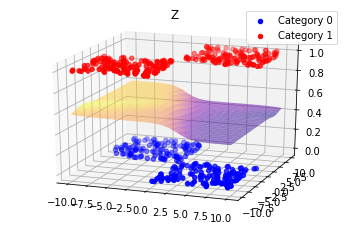

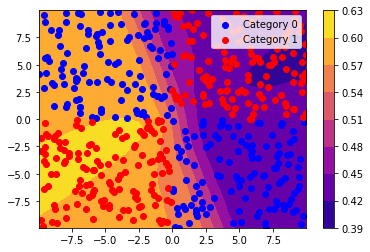

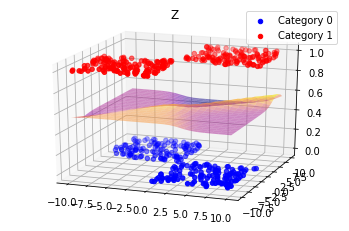

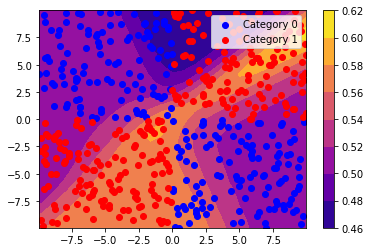

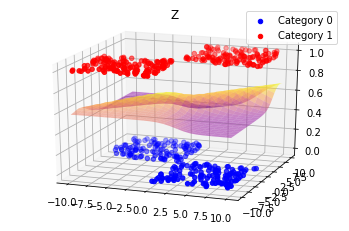

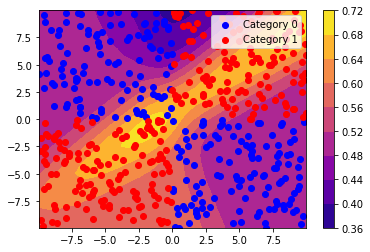

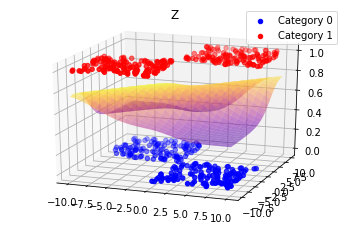

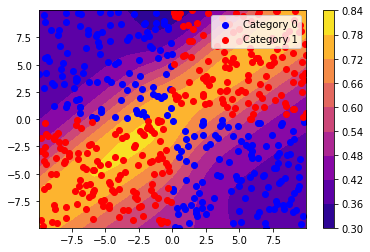

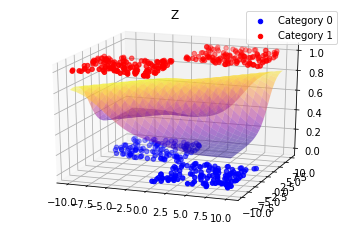

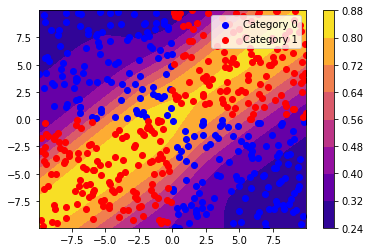

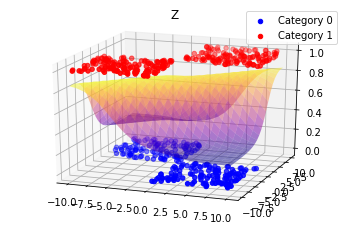

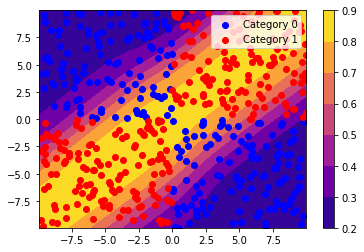

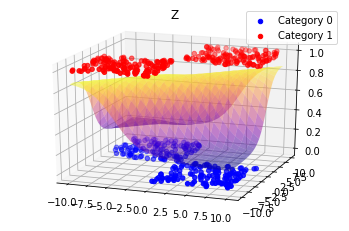

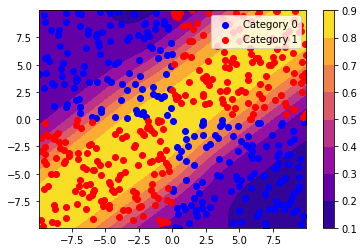

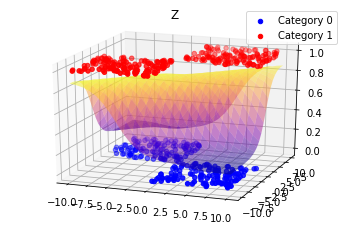

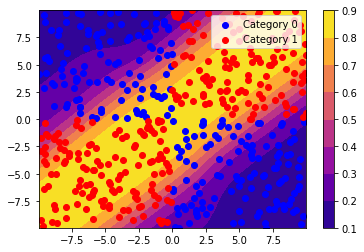

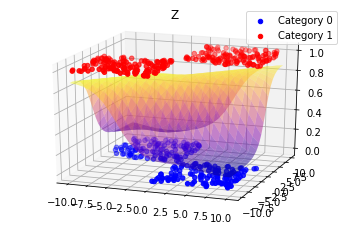

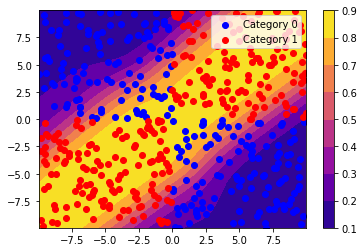

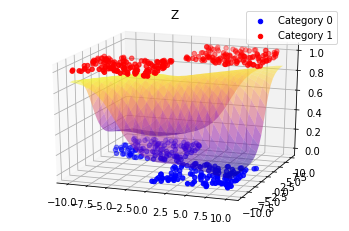

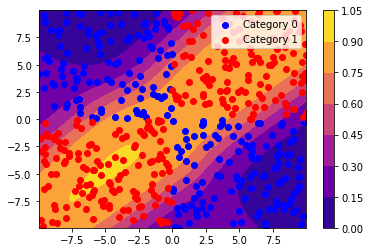

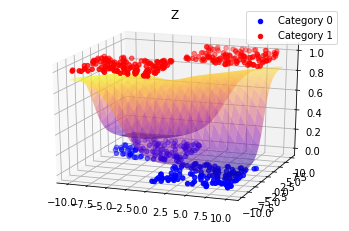

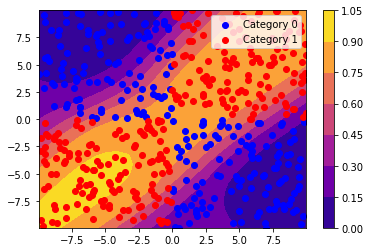

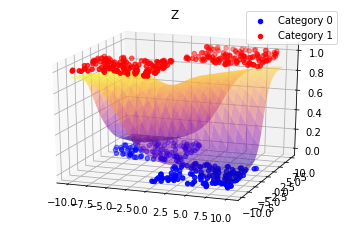

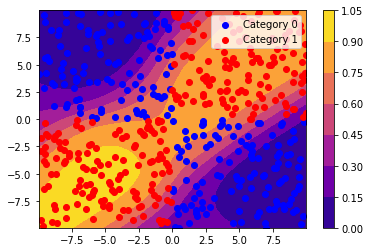

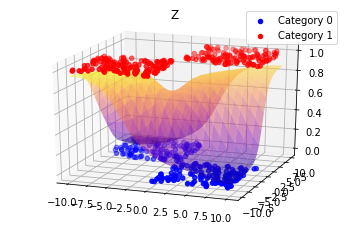

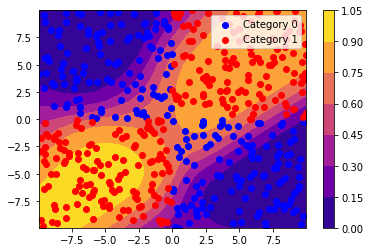

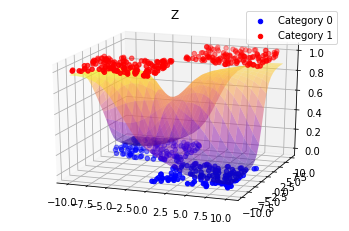

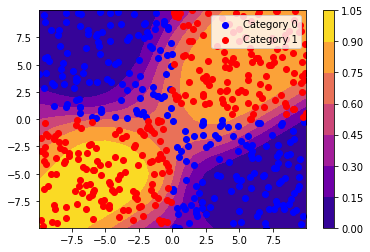

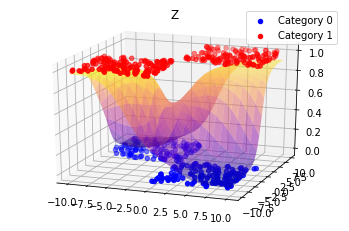

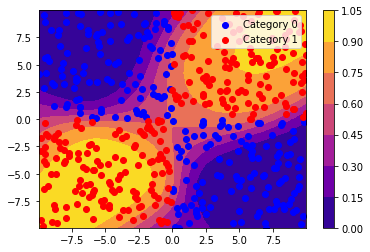

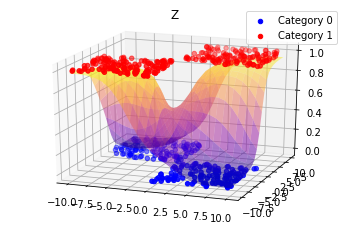

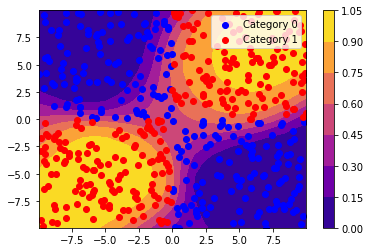

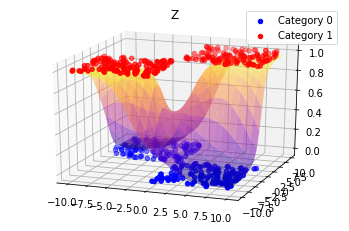

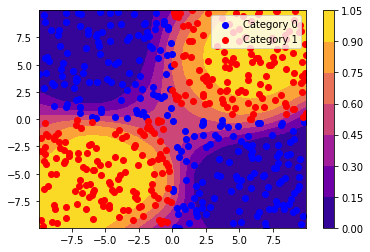

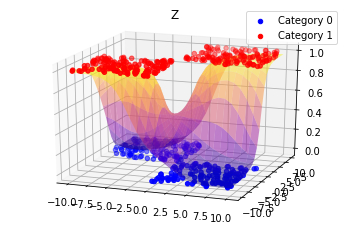

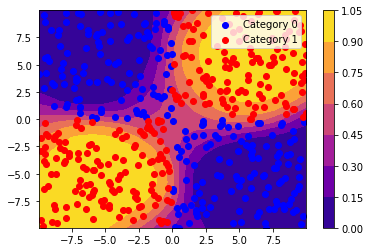

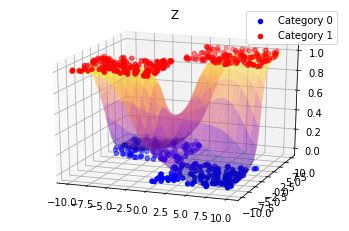

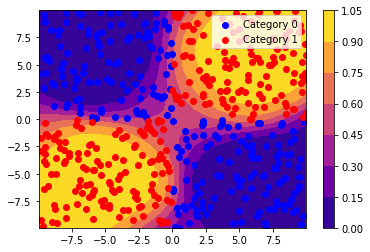

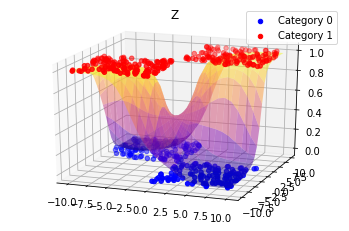

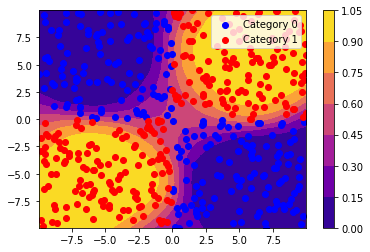

In [97]:
epochs = 2000

x_train = torch.tensor(data_in, dtype=torch.float)
y_train = torch.tensor(data_out, dtype=torch.float)

loss_hist = train_model(x_train, y_train, model_1, criterion, optim, epochs)

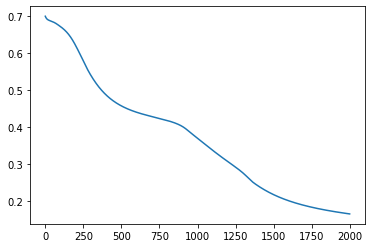

In [98]:
plt.plot(loss_hist)
plt.show()

---
# What happened behind the scenes?

 Output layer weghts : 
weight tensor([[-3.0901, -2.9787, -2.3797, -3.6692]])
bias tensor([-1.4553])


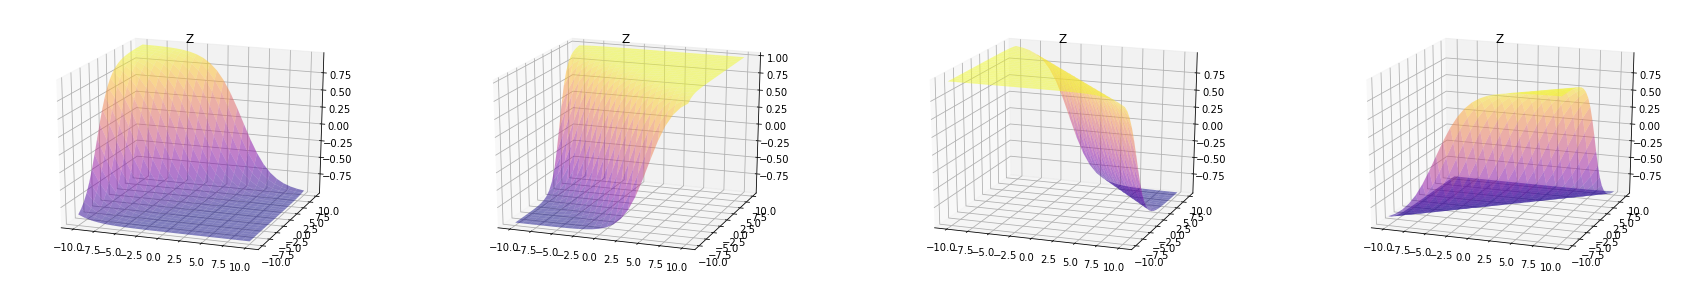

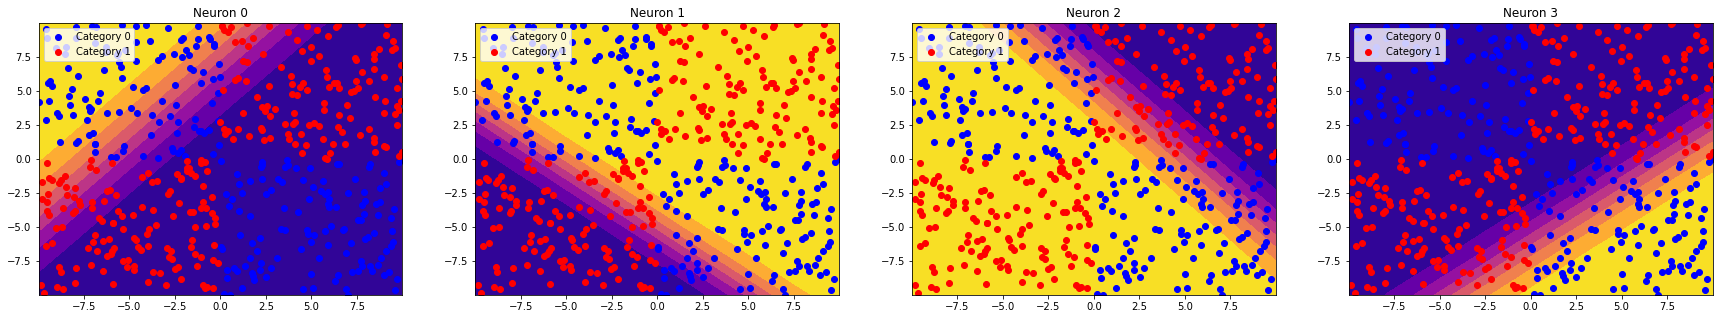

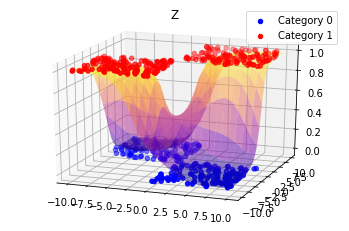

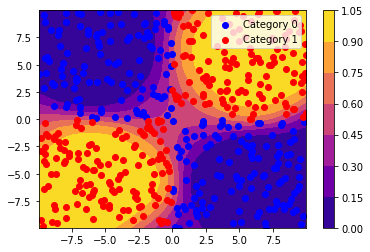

In [99]:
fig = plt.figure(figsize=(30, 5))

for hid_idx in range(4):
  ax = fig.add_subplot(1, 4, hid_idx+1, projection='3d')
  ax.set_title('Neuron %d'%hid_idx)
  vis_boundary3D(data_in, data_out, lambda x : (model_1.hidden(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), False, ax)

fig.show()

fig = plt.figure(figsize=(30, 5))

for hid_idx in range(4):
  ax = fig.add_subplot(1, 4, hid_idx+1)
  ax.set_title('Neuron %d'%hid_idx)
  vis_boundary(data_in, data_out, lambda x : (model_1.hidden(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), ax=ax)

fig.show()

print(" Output layer weghts : ")
for name, param in model_1.fc2.named_parameters():
  if param.requires_grad:
    print(name, param.data)

vis_boundary3D(data_in, data_out, lambda x : (model_1.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

vis_boundary(data_in, data_out, lambda x : (model_1.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

---

# Lets add one more layer

In [100]:
class multi_layer_network(nn.Module):
  def __init__(self, hid_sz_1 = 4, hid_sz_2 = 4):
    super(multi_layer_network, self).__init__()
    self.fc1 = nn.Linear(2, hid_sz_1)
    self.fc2 = nn.Linear(hid_sz_1, hid_sz_2)
    self.fc3 = nn.Linear(hid_sz_2, 1)

  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

  def hidden_l1(self, x):
    return torch.tanh(self.fc1(x))

  def hidden_l2(self, x):
    x = torch.tanh(self.fc1(x))
    return torch.tanh(self.fc2(x))

  def print(self):
    return

In [101]:
hid_sz_1 = 4
hid_sz_2 = 4

model_2 = multi_layer_network(hid_sz_1, hid_sz_2)
criterion = nn.BCELoss()
optim = torch.optim.SGD(model_2.parameters(), lr=1e-1)

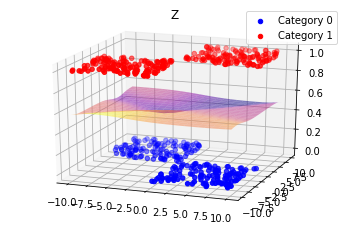

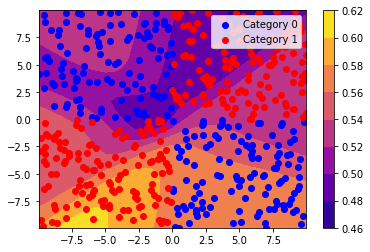

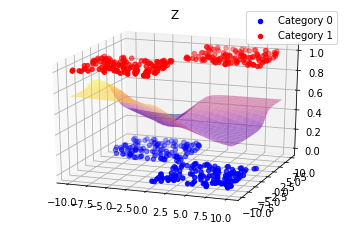

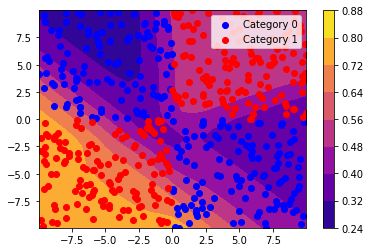

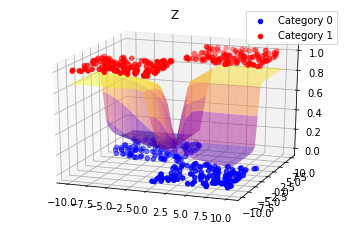

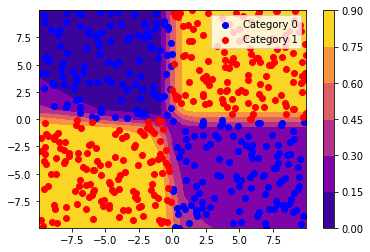

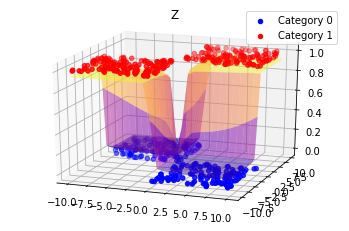

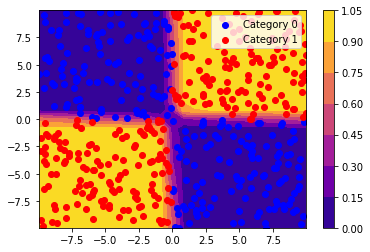

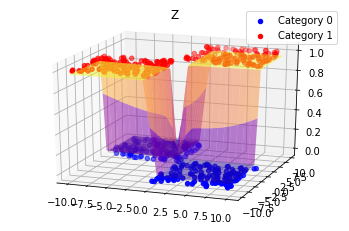

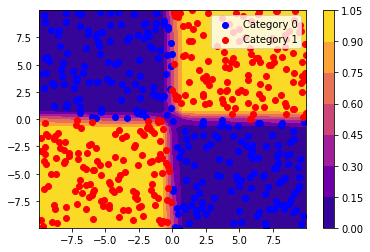

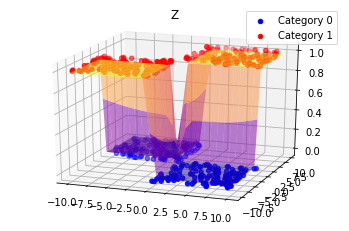

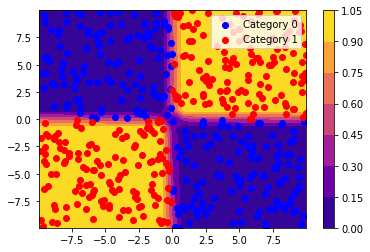

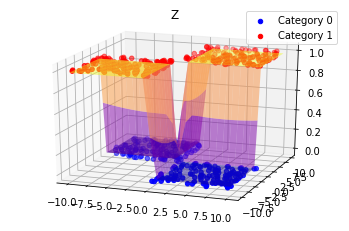

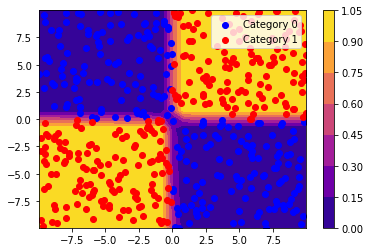

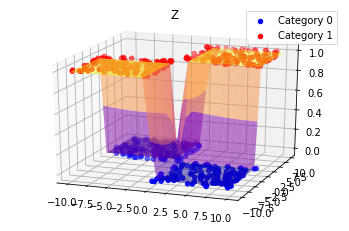

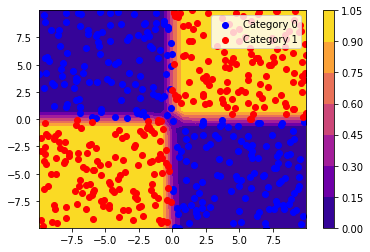

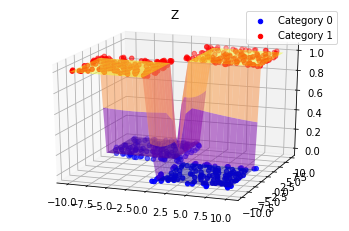

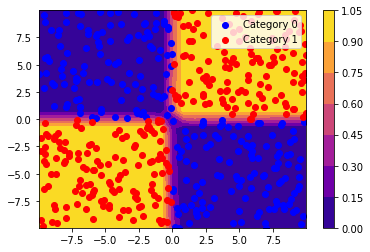

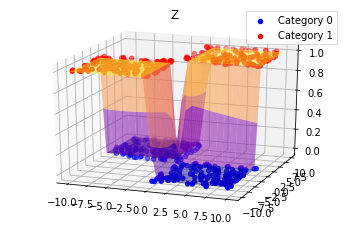

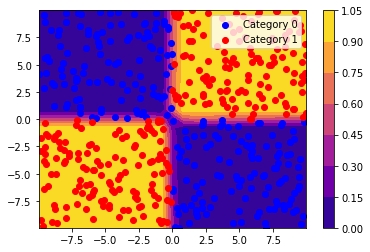

In [102]:
epochs = 2000

x_train = torch.tensor(data_in, dtype=torch.float)
y_train = torch.tensor(data_out, dtype=torch.float)

loss_hist = train_model(x_train, y_train, model_2, criterion, optim, epochs, 200)

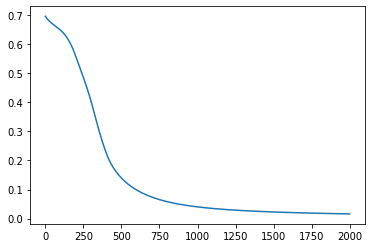

In [103]:
plt.plot(loss_hist)
plt.show()

Layer 1
Layer 2
Output


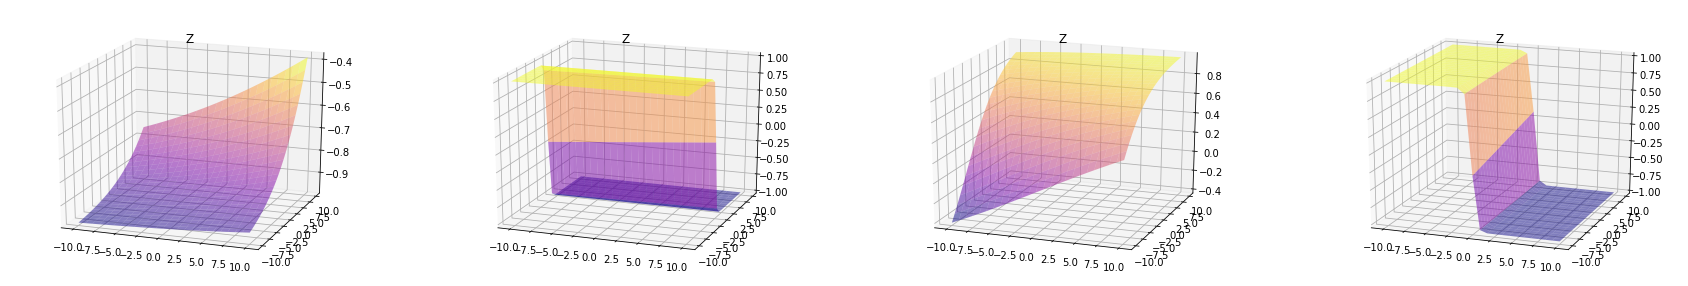

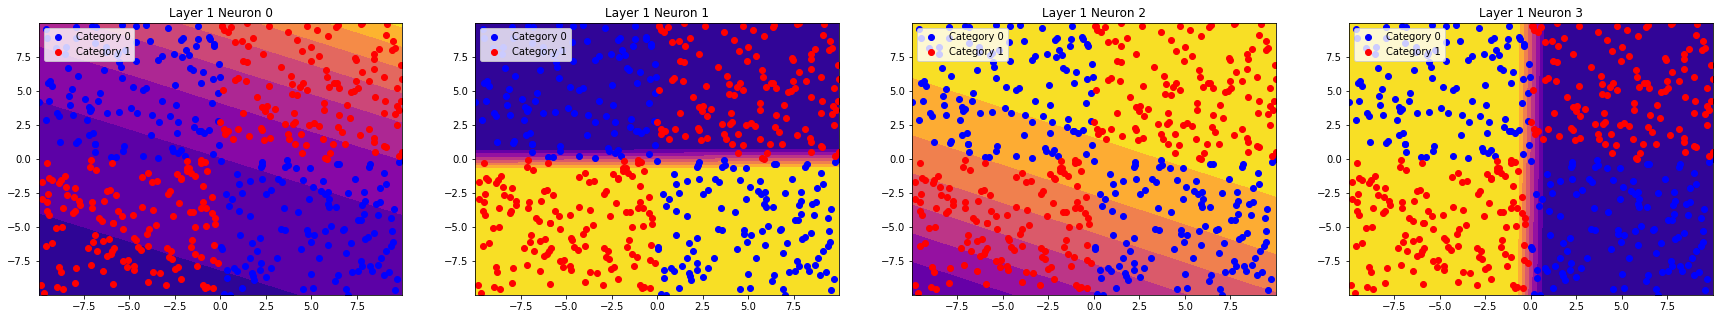

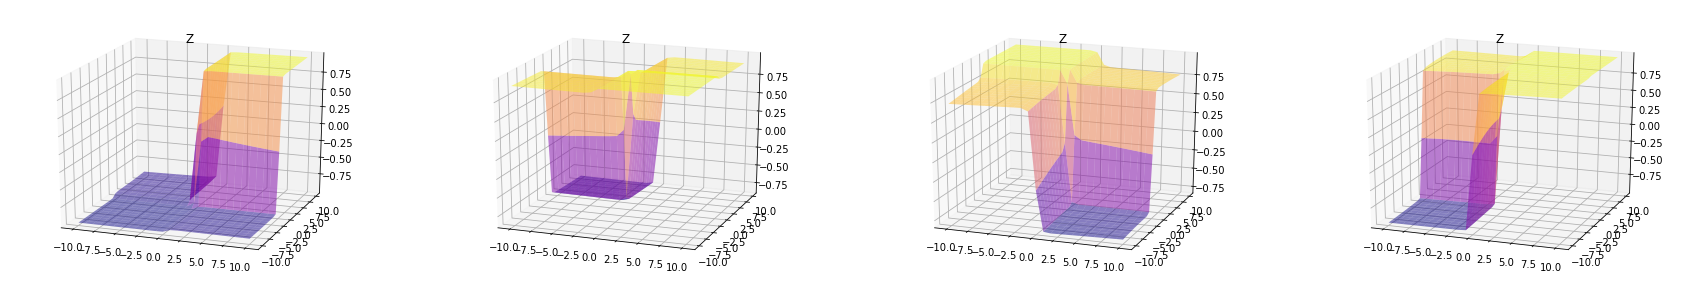

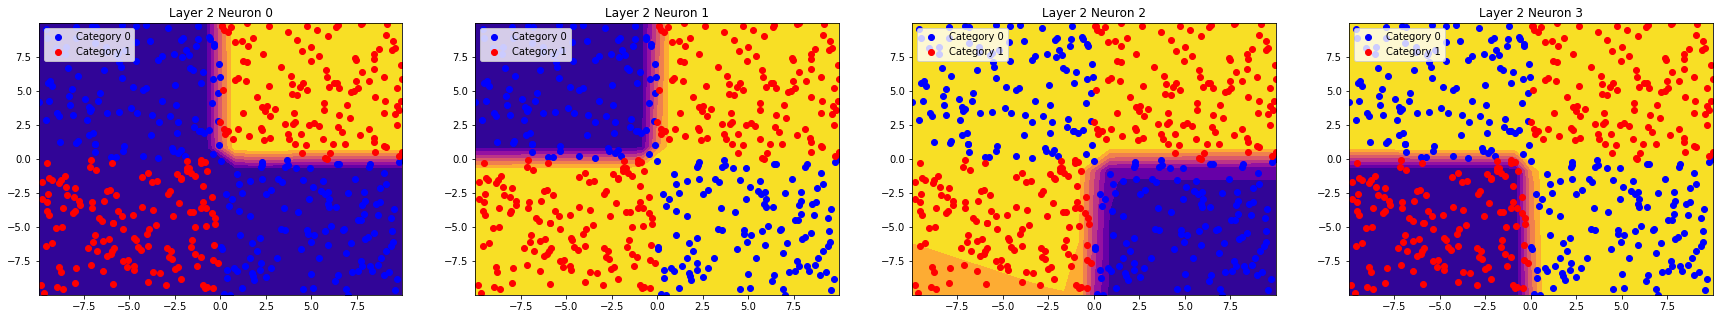

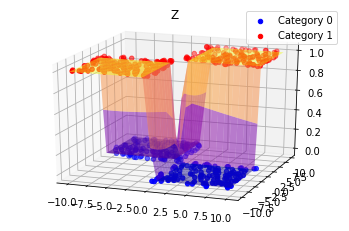

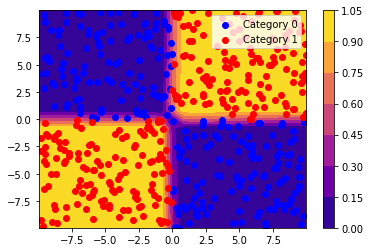

In [104]:
print("Layer 1")

fig = plt.figure(figsize=(30, 5))

for hid_idx in range(hid_sz_1):
  ax = fig.add_subplot(1, hid_sz_1, hid_idx+1, projection='3d')
  ax.set_title('Layer 1 Neuron %d'%hid_idx)
  vis_boundary3D(data_in, data_out, lambda x : (model_2.hidden_l1(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), False, ax)

fig.show()

fig = plt.figure(figsize=(30, 5))

for hid_idx in range(hid_sz_1):
  ax = fig.add_subplot(1, hid_sz_1, hid_idx+1)
  ax.set_title('Layer 1 Neuron %d'%hid_idx)
  vis_boundary(data_in, data_out, lambda x : (model_2.hidden_l1(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), True, ax)

fig.show()

print("Layer 2")

fig = plt.figure(figsize=(30, 5))

for hid_idx in range(hid_sz_2):
  ax = fig.add_subplot(1, hid_sz_2, hid_idx+1, projection='3d')
  ax.set_title('Layer 2 Neuron %d'%hid_idx)
  vis_boundary3D(data_in, data_out, lambda x : (model_2.hidden_l2(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), False, ax)

fig.show()

fig = plt.figure(figsize=(30, 5))

for hid_idx in range(hid_sz_2):
  ax = fig.add_subplot(1, hid_sz_2, hid_idx+1)
  ax.set_title('Layer 2 Neuron %d'%hid_idx)
  vis_boundary(data_in, data_out, lambda x : (model_2.hidden_l2(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), True, ax)

fig.show()

print("Output")

vis_boundary3D(data_in, data_out, lambda x : (model_2.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

vis_boundary(data_in, data_out, lambda x : (model_2.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))


In [112]:
def calc_error(inp, model, label):
  pred = model.forward(torch.tensor(inp, dtype=torch.float)).detach().numpy()
  correct = (pred > 0.5) == label
  return np.count_nonzero(correct) / len(label)

[]

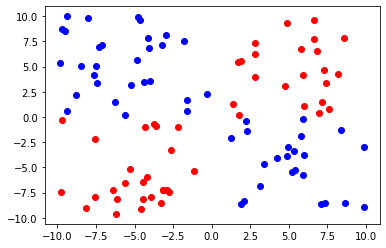

In [114]:
test_data_len = 100

data_x = np.random.uniform(-10, 10, size=(test_data_len, 1))
data_y = np.random.uniform(-10, 10, size=(test_data_len, 1))

test_data_out = act_decision(data_x, data_y)

test_data_in = np.concatenate((data_x, data_y), axis=1)

test_data_on   = np.asarray([test_data_in[i] for i in range(test_data_len) if test_data_out[i]])
test_data_off  = np.asarray([test_data_in[i] for i in range(test_data_len) if not test_data_out[i]])

plt.scatter(test_data_on[:,0], test_data_on[:,1], color="red")
plt.scatter(test_data_off[:,0], test_data_off[:,1], color="blue")
plt.plot()

In [115]:
print("Test set, model 1  : ", calc_error(test_data_in, model_1, test_data_out))
print("Train set, model 2 : ", calc_error(data_in, model_1, data_out))

print("Test set, model 1  : ", calc_error(test_data_in, model_2, test_data_out))
print("Train set, model 2 : ", calc_error(data_in, model_2, data_out))

Test set, model 1  :  0.99
Train set, model 2 :  0.954
Test set, model 1  :  1.0
Train set, model 2 :  1.0
